In [100]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [101]:
sales = pd.read_csv('/home/weiliang/Downloads/sales.csv')

In [102]:
sales.head()

,month,sales
0,2008-01,7615449
1,2008-02,8568396
2,2008-03,8819950
3,2008-04,9747502
4,2008-05,8009360


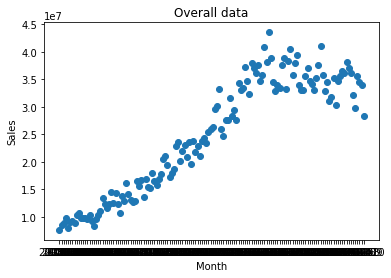

In [103]:
plt.scatter(sales['month'], sales['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title("Overall data")
plt.show()

In [23]:
def yearmonth_to_num(year_month):
    start_year = 2008
    year, month = year_month.split('-')
    index = (int(year) - start_year) * 12 + (int(month) - 1)
    return index
    

In [26]:
yearmonth_to_num("2019-02")

133

In [29]:
yearmonth_index = [yearmonth_to_num(m) for m in sales['month']]

In [32]:
sales['yearmonth_index'] = yearmonth_index

In [33]:
sales.head()

,month,sales,yearmonth_index
0,2008-01,7615449,0
1,2008-02,8568396,1
2,2008-03,8819950,2
3,2008-04,9747502,3
4,2008-05,8009360,4


In [57]:
from sklearn.model_selection import train_test_split

In [60]:
sales.values

array([['2008-01', 7615449, 0],
       ['2008-02', 8568396, 1],
       ['2008-03', 8819950, 2],
       ['2008-04', 9747502, 3],
       ['2008-05', 8009360, 4],
       ['2008-06', 9093838, 5],
       ['2008-07', 9303574, 6],
       ['2008-08', 8782821, 7],
       ['2008-09', 10311969, 8],
       ['2008-10', 10746532, 9],
       ['2008-11', 9737798, 10],
       ['2008-12', 9767261, 11],
       ['2009-01', 9827360, 12],
       ['2009-02', 9607434, 13],
       ['2009-03', 10238630, 14],
       ['2009-04', 9250043, 15],
       ['2009-05', 8405501, 16],
       ['2009-06', 9544035, 17],
       ['2009-07', 10376712, 18],
       ['2009-08', 11046516, 19],
       ['2009-09', 13334613, 20],
       ['2009-10', 12316032, 21],
       ['2009-11', 11669189, 22],
       ['2009-12', 12309787, 23],
       ['2010-01', 14467523, 24],
       ['2010-02', 12586453, 25],
       ['2010-03', 14253354, 26],
       ['2010-04', 12393216, 27],
       ['2010-05', 10672136, 28],
       ['2010-06', 13825379, 29],
     

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(sales['yearmonth_index'].values.reshape(-1,1), sales['sales'].values.reshape(-1,1), test_size=0.2)

In [74]:
X_train.shape

(113, 1)

In [75]:
y_train.shape

(113, 1)

In [76]:
X_test.shape

(29, 1)

In [77]:
y_test

array([[22957221],
       [35877543],
       [34783938],
       [17944713],
       [15446410],
       [37290433],
       [38809274],
       [25984280],
       [12309787],
       [40827962],
       [ 9093838],
       [ 9737798],
       [16634833],
       [35643695],
       [40988743],
       [23851928],
       [38037922],
       [29396922],
       [ 9607434],
       [19403888],
       [23624208],
       [14467523],
       [11669189],
       [ 7615449],
       [35253013],
       [16467282],
       [35642380],
       [23475584],
       [16863129]])

In [80]:
reg = LinearRegression().fit(X_train,  y_train)

In [81]:
reg.score(X_train,y_train)

0.8479940003023988

In [82]:
reg.coef_

array([[232236.35929691]])

In [83]:
reg.intercept_

array([8338309.22685586])

In [85]:
print(y_test)

[[22957221]
 [35877543]
 [34783938]
 [17944713]
 [15446410]
 [37290433]
 [38809274]
 [25984280]
 [12309787]
 [40827962]
 [ 9093838]
 [ 9737798]
 [16634833]
 [35643695]
 [40988743]
 [23851928]
 [38037922]
 [29396922]
 [ 9607434]
 [19403888]
 [23624208]
 [14467523]
 [11669189]
 [ 7615449]
 [35253013]
 [16467282]
 [35642380]
 [23475584]
 [16863129]]


In [107]:
predicts = reg.predict(X_test)

In [109]:
overall_diff_perc = 0

In [110]:
for y, y_hat in zip(y_test, predicts):
    overall_diff_perc += abs(y-y_hat)/y
    print("Sales: {}, Predicted Sales: {}, Diff: {}, Diff Percent: {}".format(y, y_hat, abs(y-y_hat), abs(y-y_hat)/y))
print("average diff percent: ", overall_diff_perc/len(y_test))

Sales: [22957221], Predicted Sales: [20879072.62888902], Diff: [2078148.37111098], Diff Percent: [0.09052265]
Sales: [35877543], Predicted Sales: [36671145.06107894], Diff: [793602.06107894], Diff Percent: [0.02211974]
Sales: [34783938], Predicted Sales: [29936290.64146853], Diff: [4847647.35853147], Diff Percent: [0.13936454]
Sales: [17944713], Predicted Sales: [20414599.9102952], Diff: [2469886.9102952], Diff Percent: [0.1376387]
Sales: [15446410], Predicted Sales: [17859999.95802919], Diff: [2413589.95802919], Diff Percent: [0.15625572]
Sales: [37290433], Predicted Sales: [28310636.12639016], Diff: [8979796.87360984], Diff Percent: [0.24080699]
Sales: [38809274], Predicted Sales: [32490890.59373455], Diff: [6318383.40626545], Diff Percent: [0.16280602]
Sales: [25984280], Predicted Sales: [24594854.37763959], Diff: [1389425.62236041], Diff Percent: [0.05347178]
Sales: [12309787], Predicted Sales: [13679745.4906848], Diff: [1369958.4906848], Diff Percent: [0.11129019]
Sales: [40827962

In [93]:
reg.predict(np.array([142]).reshape(-1,1))

array([[41315872.24701715]])

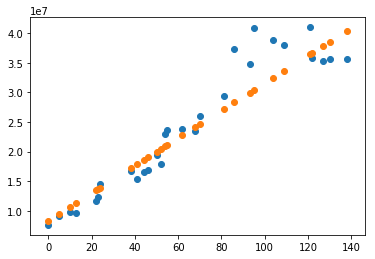

In [106]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predicts)